## Setup

In [78]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import urllib

# Import ML packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from pandas.plotting import scatter_matrix

# Suppress warnings
warnings.filterwarnings("ignore")

# To make this notebook's output stable across runs
np.random.seed(42)

print("Done importing libraries and setting up Notebook.")

Done importing libraries and setting up Notebook.


In [79]:
fitbitData = pd.read_csv("MasterDatabase.csv")
#fitbitData.head()
#fitbitData.describe()
fitbitData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
Unnamed: 0              304 non-null int64
Date                    304 non-null object
Calories                304 non-null int64
Steps                   304 non-null int64
Distance                304 non-null float64
Minutessedentary        304 non-null int64
Minuteslightlyactive    304 non-null int64
Minutesfairlyactive     304 non-null int64
Minutesveryactive       304 non-null int64
Minutes Asleep          222 non-null float64
Week Day                304 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 26.2+ KB


In [100]:
from future_encoders import ColumnTransformer
from future_encoders import OneHotEncoder

# Drop categories
fitbitData_num = fitbitData.drop(['Unnamed: 0','Date', 'Week Day'], axis = 1)

#fitbitData_num = fitbitData.drop(['Unnamed: 0', 'Steps', 'Distance', 'Minutessedentary', 'Minuteslightlyactive', 'Minutesfairlyactive', 'Minutesveryactive','Date', 'Week Day'], axis = 1)

[label, ]

num_attribs = list(numericaldata)
cat_attribs = ['Week Day']

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy = "median")),
        ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

fitbitData_prepared = full_pipeline.fit_transform(fitbitData)

label = "Calories" 

train_set, test_set = train_test_split(fitbitData, test_size=0.2, random_state=10)

x_tr = train_set.drop(label, axis = 1)
y_train = train_set[label].copy()

x_te = test_set.drop(label, axis = 1)
y_test = test_set[label].copy()

x_train = full_pipeline.transform(x_tr) #Process training data
x_test = full_pipeline.transform(x_te) #Process test data


In [94]:
# Correlations in the original database (numerical)
corr_matrix = fitbitData_num.corr()
corr_matrix["Calories"].sort_values(ascending=False)

Calories          1.000000
Minutes Asleep   -0.174041
Name: Calories, dtype: float64

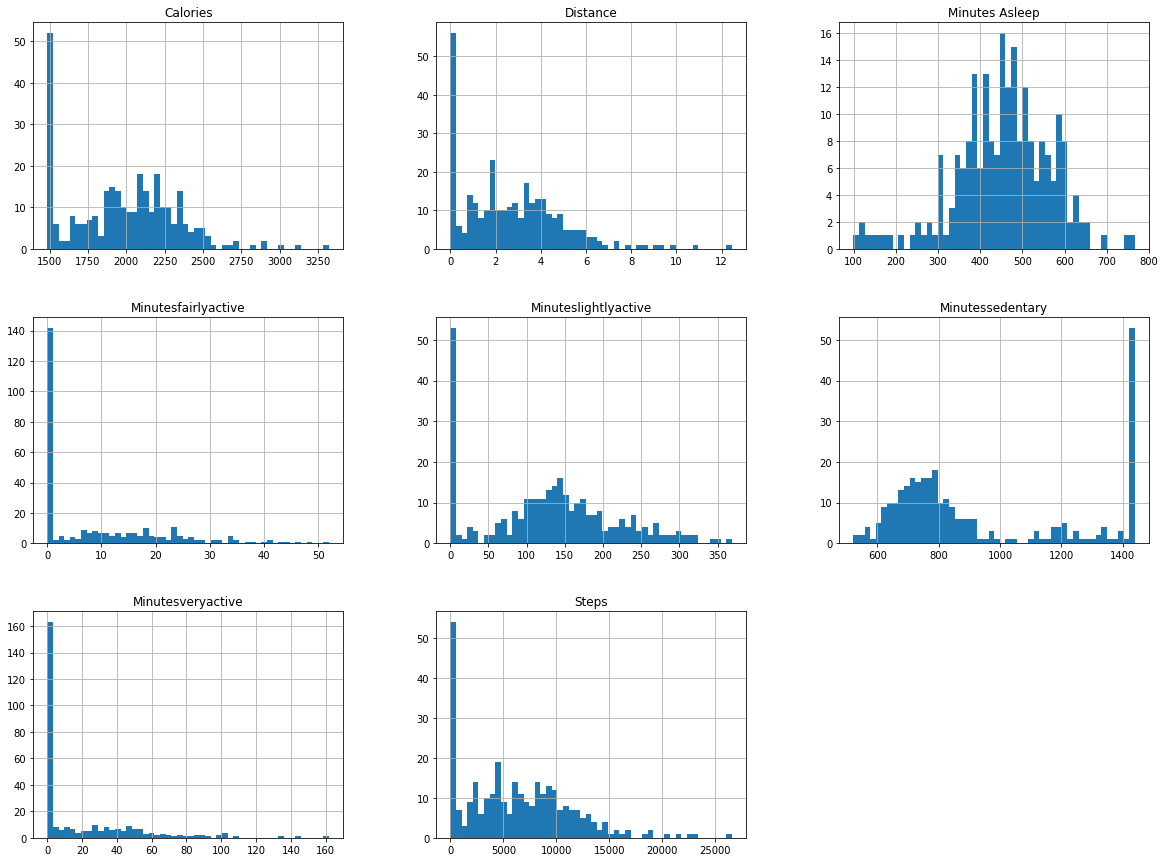

In [88]:
fitbitData_num.hist(bins = 50, figsize = (20, 15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b29def7f0>,
      dtype=object)

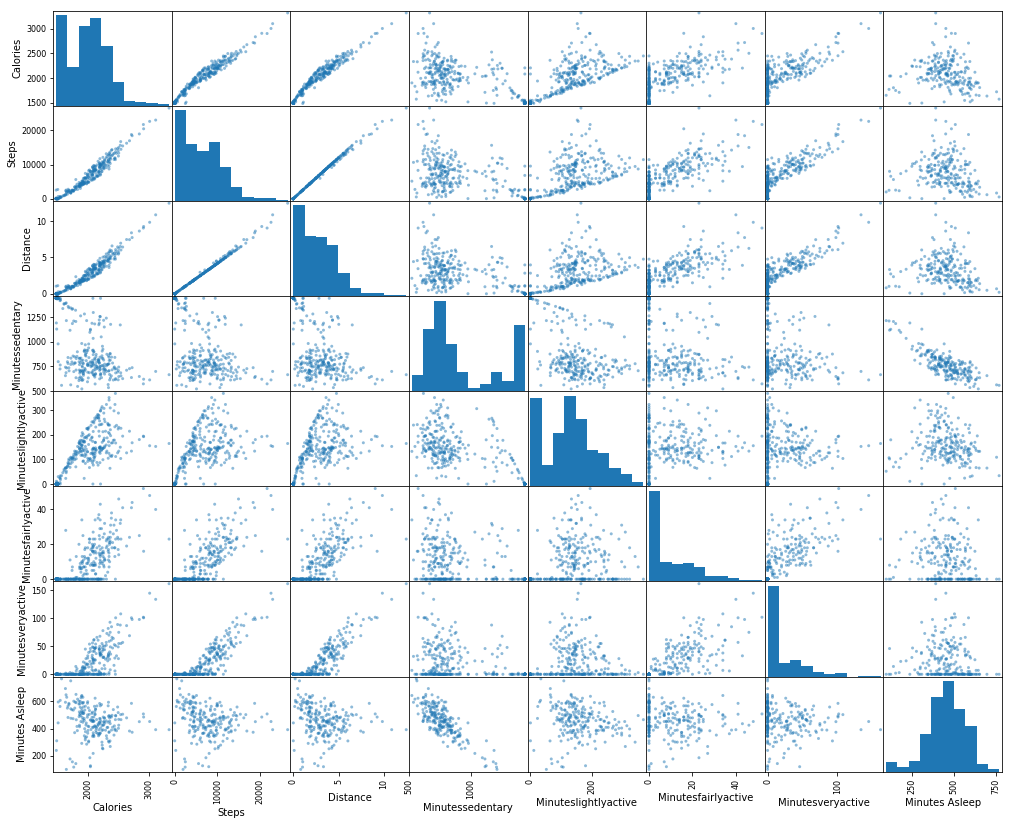

In [89]:
attributes = num_attribs
scatter_matrix(fitbitData_num[num_attribs], figsize = (17, 14))

In [97]:
from sklearn.tree import DecisionTreeRegressor

print("Decision Tree Regressor")
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

#Decision Tree Regression
#Prediction on training set
train_tree_scores = cross_val_score(tree_reg, x_train, y_train,
                                   scoring="neg_mean_squared_error", cv=10)
train_tree_rmse_scores = np.sqrt(-train_tree_scores)
print("Training data root mean square error:", train_tree_rmse_scores.mean())

#Prediction on test set
test_tree_scores = cross_val_score(tree_reg, x_test, y_test,
                                  scoring="neg_mean_squared_error", cv=10)
test_tree_rmse_scores = np.sqrt(-test_tree_scores)
print("Test data root mean square error:", test_tree_rmse_scores.mean())

Decision Tree Regressor
Training data root mean square error: 62.60173046777777
Test data root mean square error: 116.15444146965885


In [98]:
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regression based on the training data
print("RandomForest Regressor")
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train,y_train)

#Prediction on training set
train_forest_scores = cross_val_score(forest_reg, x_train, y_train,
                                      scoring="neg_mean_squared_error", cv=10)
train_forest_rmse_scores = np.sqrt(-train_forest_scores)
print("Training data root mean square error:",train_forest_rmse_scores.mean())

#Prediction on testing set
test_forest_scores = cross_val_score(forest_reg, x_test, y_test,
                                     scoring="neg_mean_squared_error", cv=10)
test_forest_rmse_scores = np.sqrt(-test_forest_scores)
print("Test data root mean square error:", test_forest_rmse_scores.mean())

RandomForest Regressor
Training data root mean square error: 47.436083711779744
Test data root mean square error: 79.04935466631332


In [99]:
from sklearn.svm import SVR
#Same issue as above

gamma1, gamma2, gamma3 = 0.1, 0.01, 0.001
C1, C2, C3 = 1, 500, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma2, C1), (gamma2, C2), (gamma2, C3), (gamma3, C1), (gamma3, C2), (gamma3, C3)  

from sklearn.model_selection import cross_val_score

for gamma, C in hyperparams:

    rbf_kernel_svRg_clf = SVR(kernel="rbf", gamma = gamma, C=C)
    rbf_kernel_svRg_clf.fit(x_train, y_train)

    #Performance metrics
    from sklearn.model_selection import cross_val_score

    svRg_mse = cross_val_score(rbf_kernel_svRg_clf, x_test, y_test, cv=3, scoring="neg_mean_squared_error")

    svRg_rmse = np.sqrt(-svRg_mse)
    
    print("\n gamma is " + str(gamma))
    print("C is " + str(C))
    print("average:")
    svRg_average_error = np.mean(svRg_rmse)
    print(svRg_average_error)
    


 gamma is 0.1
C is 1
average:
352.473435083416

 gamma is 0.1
C is 500
average:
117.29634796778377

 gamma is 0.1
C is 1000
average:
97.48381072340135

 gamma is 0.01
C is 1
average:
354.86650750993937

 gamma is 0.01
C is 500
average:
80.76567540730368

 gamma is 0.01
C is 1000
average:
69.17200782107422

 gamma is 0.001
C is 1
average:
356.5950583048988

 gamma is 0.001
C is 500
average:
240.19041641161257

 gamma is 0.001
C is 1000
average:
156.18801978882058
